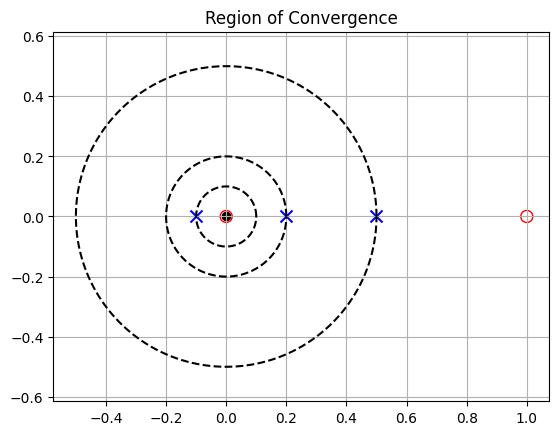

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_coeff = [1, -1, 0]
denom_coeff = [1, -0.6000000000000001, 0.03, 0.010000000000000002]

zeros = np.roots(num_coeff)
poles = np.roots(denom_coeff)

plt.scatter(0,0,c='k')

w = np.linspace(0,2*np.pi,1000)
for pole in poles:
    radius = abs(pole)
    x = radius * np.cos(w)
    y = radius * np.sin(w)
    plt.scatter(np.real(pole),np.imag(pole),marker='x',c='b',s=75)
    plt.plot(x,y,linestyle='dashed',c='k')

for zero in zeros:
    plt.scatter(np.real(zero),np.imag(zero),marker='o',s=75,facecolors='none',edgecolors='r')
plt.title("Region of Convergence")
plt.axis('equal')
plt.grid(True)
plt.show()




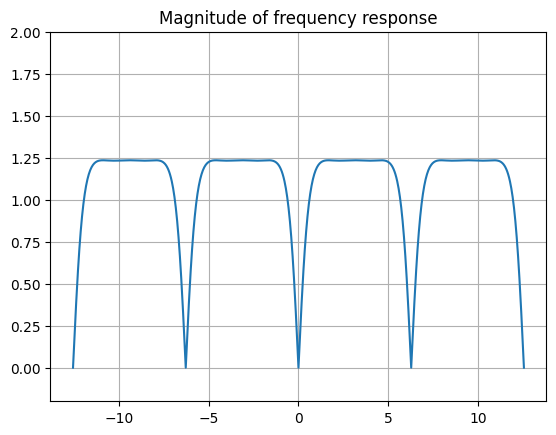

In [2]:
#frequency response

w1 = np.linspace(-4*np.pi,4*np.pi,1001,endpoint=True)
power_x =1
x = np.exp(1j*w1)
num = 0
for i in num_coeff:
    num = num + i*power_x
    power_x = power_x * x
power_x =1
denom = 0
for i in denom_coeff:
    denom = denom + i*power_x
    power_x = power_x * x

freq_response = num/denom

plt.plot(w1,abs(freq_response))
plt.title("Magnitude of frequency response")
plt.ylim(-0.2,2)
plt.grid(True)




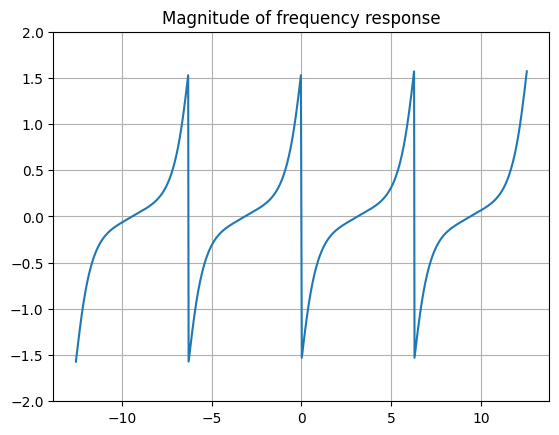

In [3]:
plt.plot(w1,np.angle(freq_response))
plt.title("Magnitude of frequency response") 
plt.ylim(-2,2) 
plt.grid(True)

In [44]:
N = 50
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)
Z = X + 1j*Y


numerator = np.array([[0 for col in range(N)] for row in range(N)])
p = np.array([[1 for col in range(N)] for row in range(N)])

for i in num_coeff:
    numerator = numerator + i*p
    p= p*Z
denominator = np.array([[0 for col in range(N)] for row in range(N)])
p = np.array([[1 for col in range(N)] for row in range(N)])
for i in denom_coeff:
    denominator = denominator + i*p
    p= p*Z

NZ_mag = np.abs(numerator)
DZ_mag = np.abs(denominator)
NZ_angle = np.angle(numerator)
DZ_angle = np.angle(denominator)


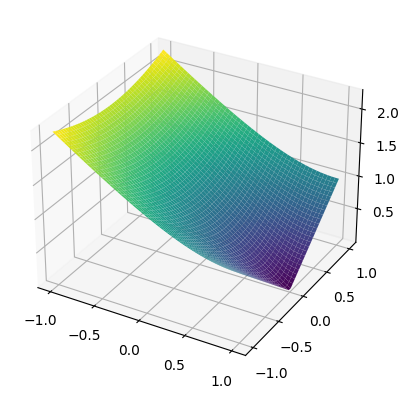

In [45]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,NZ_mag,cmap='viridis')

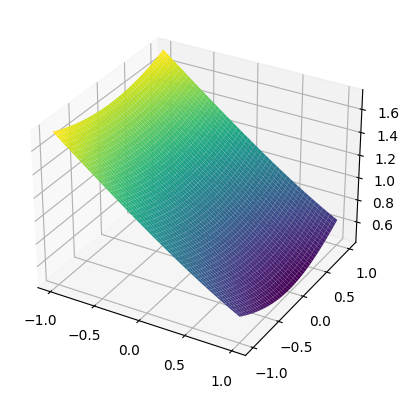

In [46]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,DZ_mag,cmap='viridis')

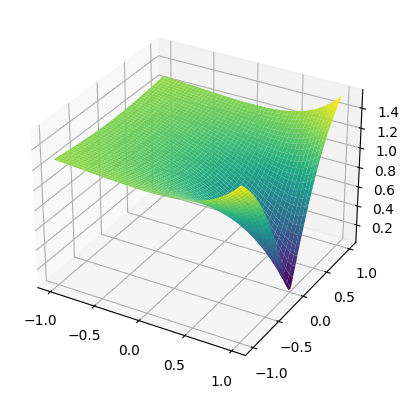

In [47]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,NZ_mag/DZ_mag,cmap='viridis')

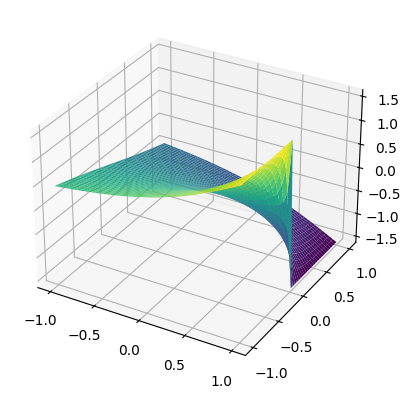

In [48]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,NZ_angle,cmap='viridis')

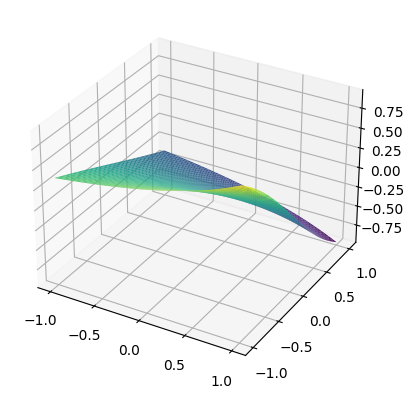

In [49]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,DZ_angle,cmap='viridis')

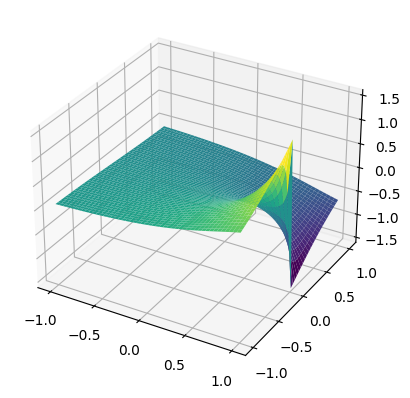

In [50]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,NZ_angle - DZ_angle,cmap='viridis')

In [51]:
plt.show()